In [1]:
from sklearn.datasets import load_wine
import pandas as pd
wine_data = load_wine(as_frame=True)
feature_name = ['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                'proanthocyanins','color_intensity','hue', 'od280/od315_of_diluted_wines', 'proline']
df = pd.DataFrame(wine_data.data, columns=feature_name)
df['class'] = wine_data['target']
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
# Number of data in each class
print('Original Data')
df['class'].value_counts()

Original Data


1    71
0    59
2    48
Name: class, dtype: int64

<Axes: >

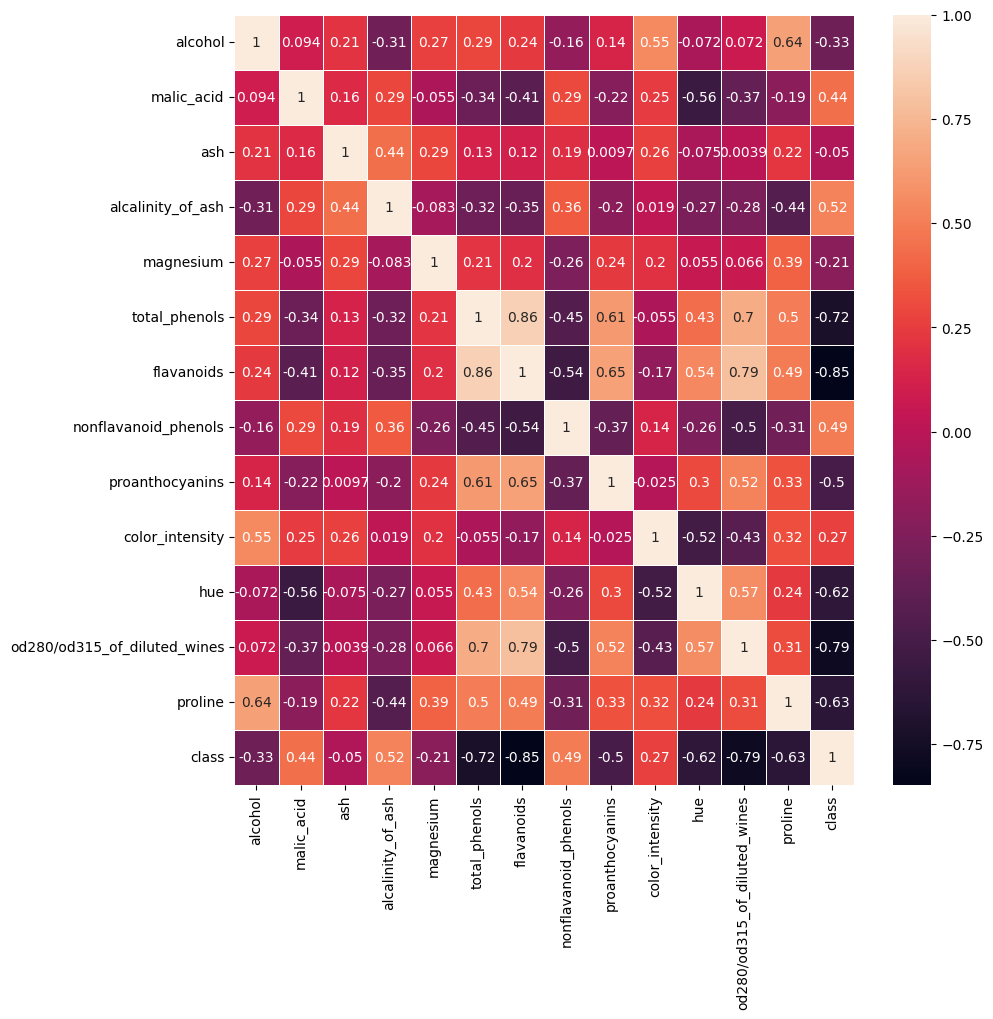

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
# analyze the correlations between each variable
fig, ax = plt.subplots(figsize=(10,10)) 
sb.heatmap(df.corr(),linewidth = 0.5,annot=True)

In [75]:
# Dataset separation
from sklearn.model_selection import train_test_split
import pandas as pd
selected_features = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines', 'proline']
# selected_features = ['alcohol', 'total_phenols', 'flavanoids', 'proline']
X = df[selected_features].values
y = df.iloc[:, -1].values # Select y from the last column (class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape    : {X_test.shape}")

Training data shape: (106, 4)
Test data shape    : (72, 4)


In [76]:
# Get the unique class labels and their counts
import numpy as np
unique_classes, counts = np.unique(y_test, return_counts=True)
# Print the number of data in each class
print('Test data')
for class_label, count in zip(unique_classes, counts):
    print(f"Class {class_label}: {count} data points")

Test data
Class 0: 24 data points
Class 1: 29 data points
Class 2: 19 data points


In [77]:
# Apply standardization to the input variables
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
np.set_printoptions(precision=2, suppress=True) 
print(f"Sample data before scaled: {X_train[0]}") 
print(f"Sample data after scaled: {X_train_std[0]}")

Sample data before scaled: [  1.55   0.52   2.06 520.  ]
Sample data after scaled: [-1.28 -1.45 -0.82 -0.73]


In [78]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(penalty='none', solver='lbfgs') 
log_regr.fit(X_train_std, y_train)
prediction = log_regr.predict(X_test_std)
print(f"Class prediction: {prediction}")
print(f"Class label: {y_test}")

Class prediction: [0 2 0 1 0 0 1 0 1 0 1 2 2 2 2 1 0 1 0 0 1 0 2 0 1 2 1 2 2 0 1 1 2 1 0 0 1
 2 2 0 2 0 2 2 2 2 1 1 2 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 2 1 2 1 0 2 0]
Class label: [1 2 0 2 0 1 1 1 1 0 1 2 2 2 2 1 0 1 0 0 1 0 2 0 1 2 1 2 1 0 0 1 2 1 0 0 1
 2 1 0 2 0 2 2 2 2 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 2 1 2 1 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [79]:
# Print the class probability
print('Class probability of the first 10 data:')
print(log_regr.predict_proba(X_test_std)[:10])

Class probability of the first 10 data:
[[0.98 0.02 0.  ]
 [0.   0.   1.  ]
 [0.87 0.13 0.  ]
 [0.   1.   0.  ]
 [1.   0.   0.  ]
 [0.54 0.46 0.  ]
 [0.   1.   0.  ]
 [0.99 0.01 0.  ]
 [0.   1.   0.  ]
 [0.96 0.04 0.  ]]


In [80]:
# Calculate the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy = {accuracy.round(4)}")

Accuracy = 0.8889


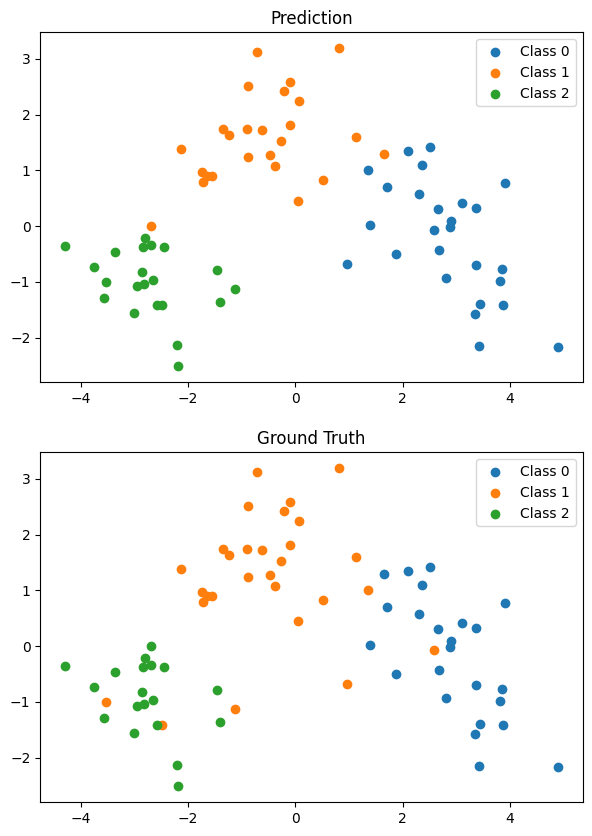

In [81]:
# Visualization of classification result
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
# Reduce the dimension
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
# Plot the figure
fig, ax = plt.subplots(2,figsize=(7,10))
ax[0].title.set_text('Prediction')
ax[0].scatter(X_test_lda[prediction==0][:,0], X_test_lda[prediction==0][:,1],label='Class 0') 
ax[0].scatter(X_test_lda[prediction==1][:,0], X_test_lda[prediction==1][:,1],label='Class 1') 
ax[0].scatter(X_test_lda[prediction==2][:,0], X_test_lda[prediction==2][:,1],label='Class 2') 
ax[1].title.set_text('Ground Truth')
ax[1].scatter(X_test_lda[y_test==0][:,0], X_test_lda[y_test==0][:,1],label='Class 0') 
ax[1].scatter(X_test_lda[y_test==1][:,0], X_test_lda[y_test==1][:,1],label='Class 1') 
ax[1].scatter(X_test_lda[y_test==2][:,0], X_test_lda[y_test==2][:,1],label='Class 2') 
ax[0].legend(); ax[1].legend(); plt.show()

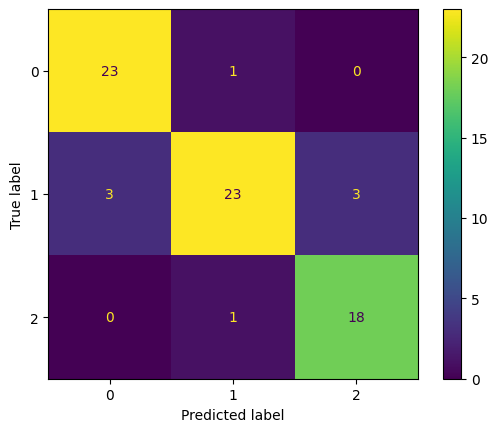

In [82]:
# Show the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, prediction, labels=log_regr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_regr.classes_)
display.plot()

Accuracy = 1.0


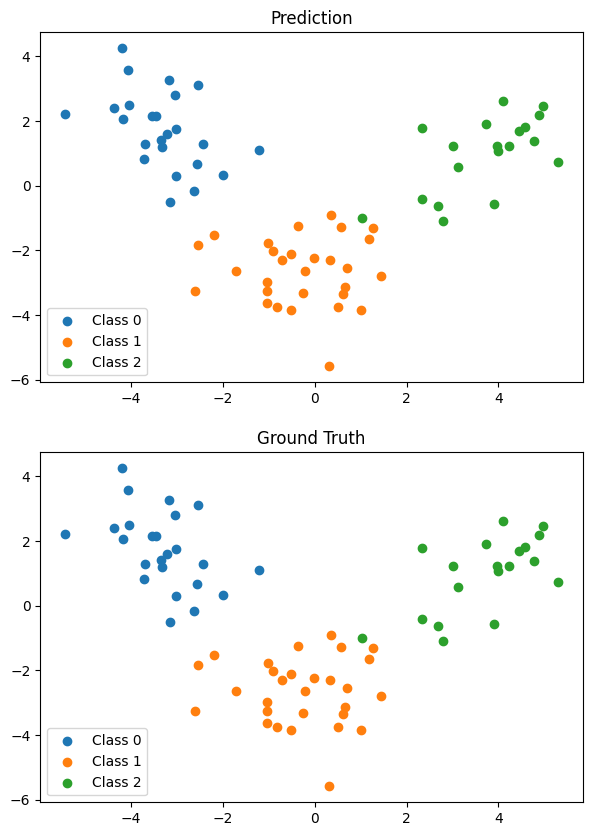

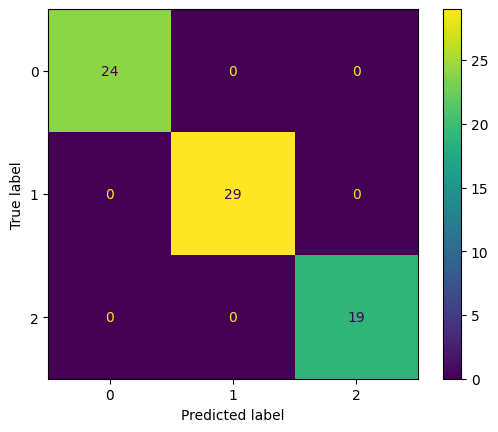

In [92]:
#Exercise12
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(penalty='l2', solver='liblinear')
#penalty : l1, l2, elasticnet, None
#solver : lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga

selected_features = ['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                'proanthocyanins','color_intensity','hue', 'od280/od315_of_diluted_wines', 'proline']
X = df[selected_features].values
y = df.iloc[:, -1].values # Select y from the last column (class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
log_regr.fit(X_train_std, y_train)
prediction = log_regr.predict(X_test_std)
# print(f"Class prediction: {prediction}")
# print(f"Class label: {y_test}")

# Calculate the accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy = {accuracy.round(4)}")

# Visualization of classification result
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Reduce the dimension
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

# Plot the figure
fig, ax = plt.subplots(2,figsize=(7,10))
ax[0].title.set_text('Prediction')
ax[0].scatter(X_test_lda[prediction==0][:,0], X_test_lda[prediction==0][:,1],label='Class 0') 
ax[0].scatter(X_test_lda[prediction==1][:,0], X_test_lda[prediction==1][:,1],label='Class 1') 
ax[0].scatter(X_test_lda[prediction==2][:,0], X_test_lda[prediction==2][:,1],label='Class 2') 
ax[1].title.set_text('Ground Truth')
ax[1].scatter(X_test_lda[y_test==0][:,0], X_test_lda[y_test==0][:,1],label='Class 0') 
ax[1].scatter(X_test_lda[y_test==1][:,0], X_test_lda[y_test==1][:,1],label='Class 1') 
ax[1].scatter(X_test_lda[y_test==2][:,0], X_test_lda[y_test==2][:,1],label='Class 2') 
ax[0].legend(); ax[1].legend(); plt.show()

# Show the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, prediction, labels=log_regr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_regr.classes_)
display.plot()

Accuracy = 0.9583


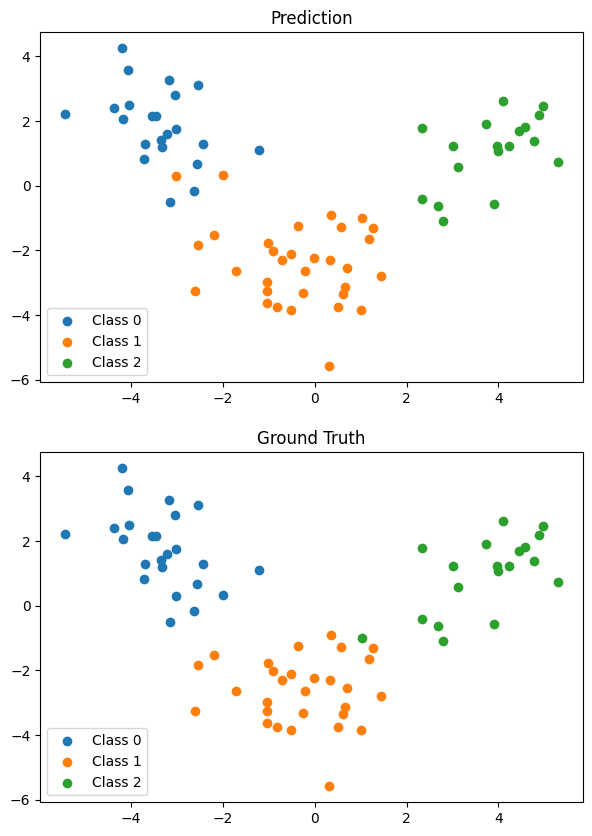

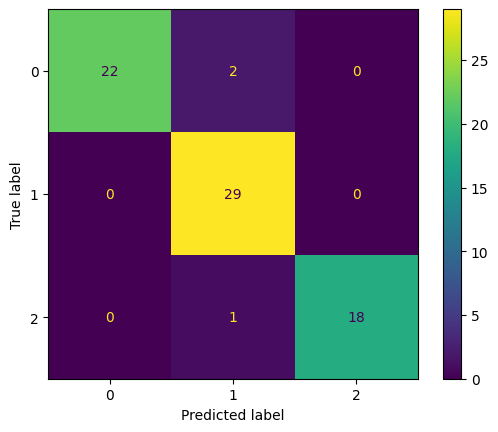

In [104]:
#Additional Data Code
#what the professor said Without StandardScaler example

from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(penalty='l2', solver='liblinear')
#penalty : l1, l2, elasticnet, None
#solver : lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga

selected_features = ['alcohol','malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
                'proanthocyanins','color_intensity','hue', 'od280/od315_of_diluted_wines', 'proline']
X = df[selected_features].values
y = df.iloc[:, -1].values # Select y from the last column (class)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

log_regr.fit(X_train, y_train)
prediction = log_regr.predict(X_test)
# print(f"Class prediction: {prediction}")
# print(f"Class label: {y_test}")

# Calculate the accuracy score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy = {accuracy.round(4)}")

# Visualization of classification result
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Reduce the dimension
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Plot the figure
fig, ax = plt.subplots(2,figsize=(7,10))
ax[0].title.set_text('Prediction')
ax[0].scatter(X_test_lda[prediction==0][:,0], X_test_lda[prediction==0][:,1],label='Class 0') 
ax[0].scatter(X_test_lda[prediction==1][:,0], X_test_lda[prediction==1][:,1],label='Class 1') 
ax[0].scatter(X_test_lda[prediction==2][:,0], X_test_lda[prediction==2][:,1],label='Class 2') 
ax[1].title.set_text('Ground Truth')
ax[1].scatter(X_test_lda[y_test==0][:,0], X_test_lda[y_test==0][:,1],label='Class 0') 
ax[1].scatter(X_test_lda[y_test==1][:,0], X_test_lda[y_test==1][:,1],label='Class 1') 
ax[1].scatter(X_test_lda[y_test==2][:,0], X_test_lda[y_test==2][:,1],label='Class 2') 
ax[0].legend(); ax[1].legend(); plt.show()

# Show the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, prediction, labels=log_regr.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_regr.classes_)
display.plot()